# Emittance measurement simulation

In [1]:
import sys
import os
from pprint import pprint
import numpy as np
from matplotlib import pyplot as plt
import proplot as pplt

sys.path.append('/Users/46h/Research/')
from accphys.tools import beam_analysis as ba
from accphys.tools import plotting as myplt
from accphys.tools import utils

## Wire-scanner reconstruction

In [2]:
pplt.rc['grid.alpha'] = 0.05
pplt.rc['axes.grid'] = False

In [3]:
file = open('_output/data/rec_node_names.txt', 'r')
rec_node_names = [line.rstrip() for line in file]
file.close()

In [4]:
rec_node_positions = np.loadtxt('_output/data/rec_node_positions.dat')

Sigmas[i, j, :, :] is the 4x4 covariance matrix for node i, trial j

In [5]:
Sigmas = np.load('_output/data/Sigmas.npy')
Sigmas.shape

(79, 10, 4, 4)

In [6]:
Sigmas_std = np.std(Sigmas, axis=1)
Sigmas_std.shape

(79, 4, 4)

In [7]:
Sigmas_mean = np.mean(Sigmas, axis=1)
Sigmas_mean.shape

(79, 4, 4)

In [8]:
moments_mean = np.array([utils.mat2vec(Sigma) for Sigma in Sigmas_mean])
stats_ws = ba.StatsReader()
stats_ws.read_moments(moments_mean)

## Simulated beam

In [9]:
coords = np.load('_output/data/coords.npy')
moments = []
for X in coords:
    Sigma = np.cov(X.T)
    moments.append(utils.mat2vec(Sigma[:4, :4]))

In [10]:
stats_beam = ba.StatsReader()
stats_beam.read_moments(moments)

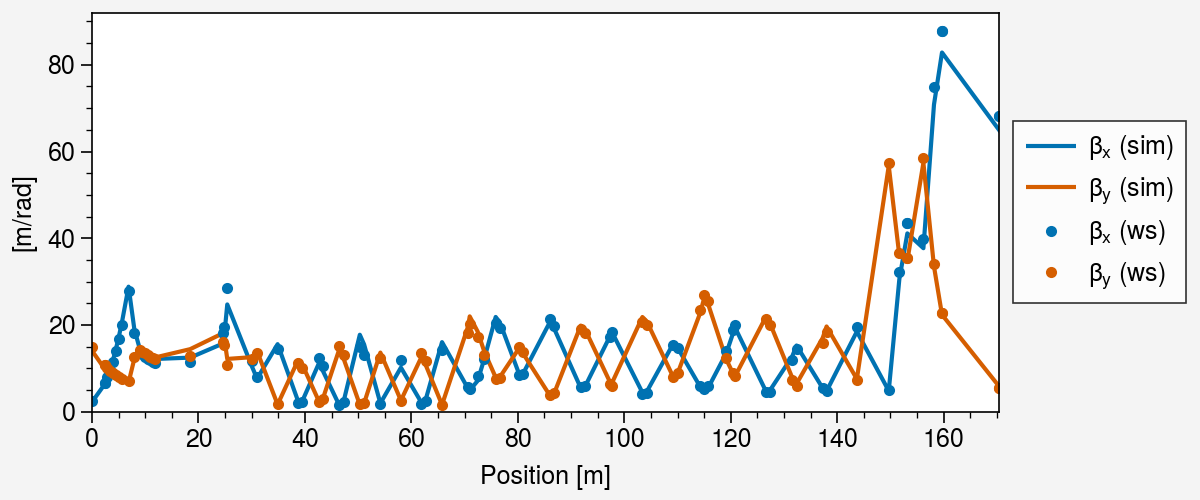

In [11]:
fig, ax = pplt.subplots(figsize=(6, 2.5))


line_kws = dict()
g1 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['beta_x'], **line_kws)
g2 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['beta_y'], **line_kws)

ax.format(cycle='colorblind')
line_kws = dict(lw=0, marker='.')
g3 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['beta_x'], **line_kws)
g4 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['beta_y'], **line_kws)

ax.legend([g1, g2, g3, g4], 
          labels=[r'$\beta_x$ (sim)', r'$\beta_y$ (sim)',
                  r'$\beta_x$ (ws)', r'$\beta_y$ (ws)'],
          ncols=1, loc='r')

ax.format(ylabel='[m/rad]', xlabel='Position [m]', ylim=(0., ax.get_ylim()[1]))

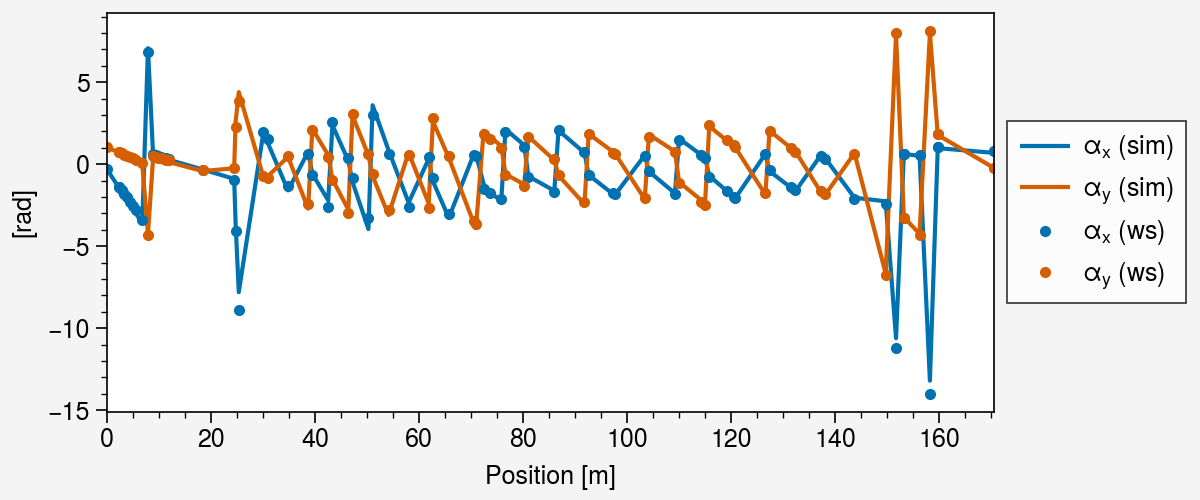

In [12]:
fig, ax = pplt.subplots(figsize=(6, 2.5))


line_kws = dict()
g1 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['alpha_x'], **line_kws)
g2 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['alpha_y'], **line_kws)

ax.format(cycle='colorblind')
line_kws = dict(lw=0, marker='.')
g3 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['alpha_x'], **line_kws)
g4 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['alpha_y'], **line_kws)

ax.legend([g1, g2, g3, g4], 
          labels=[r'$\alpha_x$ (sim)', r'$\alpha_y$ (sim)',
                  r'$\alpha_x$ (ws)', r'$\alpha_y$ (ws)'],
          ncols=1, loc='r')

ax.format(ylabel='[rad]', xlabel='Position [m]')

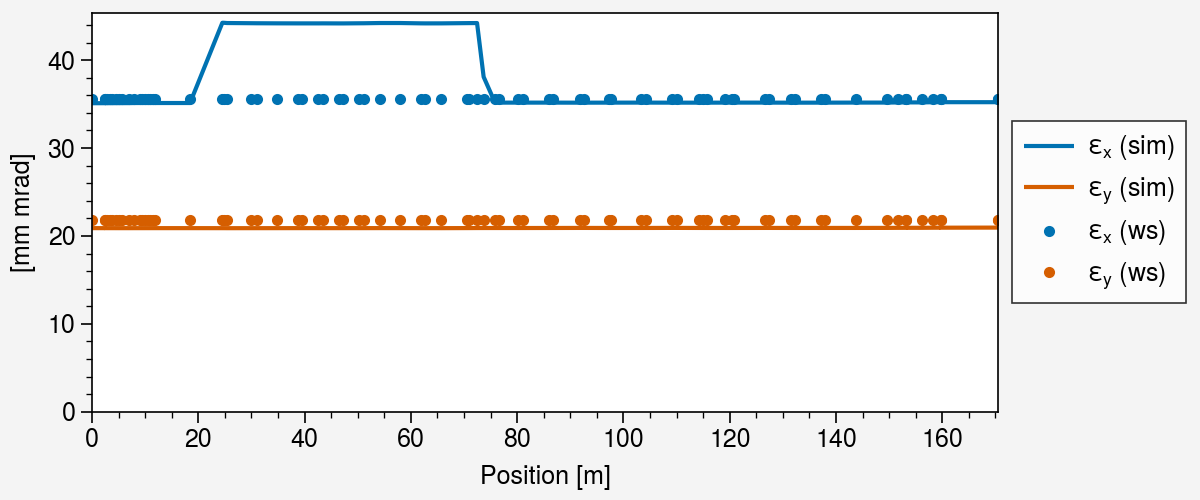

In [13]:
fig, ax = pplt.subplots(figsize=(6, 2.5))

line_kws = dict()
g1 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['eps_x'], **line_kws)
g2 = ax.plot(rec_node_positions[:, 0], stats_beam.twiss2D['eps_y'], **line_kws)

ax.format(cycle='colorblind')
line_kws = dict(lw=0, marker='.')
g3 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['eps_x'], **line_kws)
g4 = ax.plot(rec_node_positions[:, 0], stats_ws.twiss2D['eps_y'], **line_kws)

ax.legend([g1, g2, g3, g4], 
          labels=[r'$\varepsilon_x$ (sim)', r'$\varepsilon_y$ (sim)',
                  r'$\varepsilon_x$ (ws)', r'$\varepsilon_y$ (ws)'],
          ncols=1, loc='r')

ax.format(ylabel='[mm mrad]', xlabel='Position [m]', ylim=(0., ax.get_ylim()[1]))

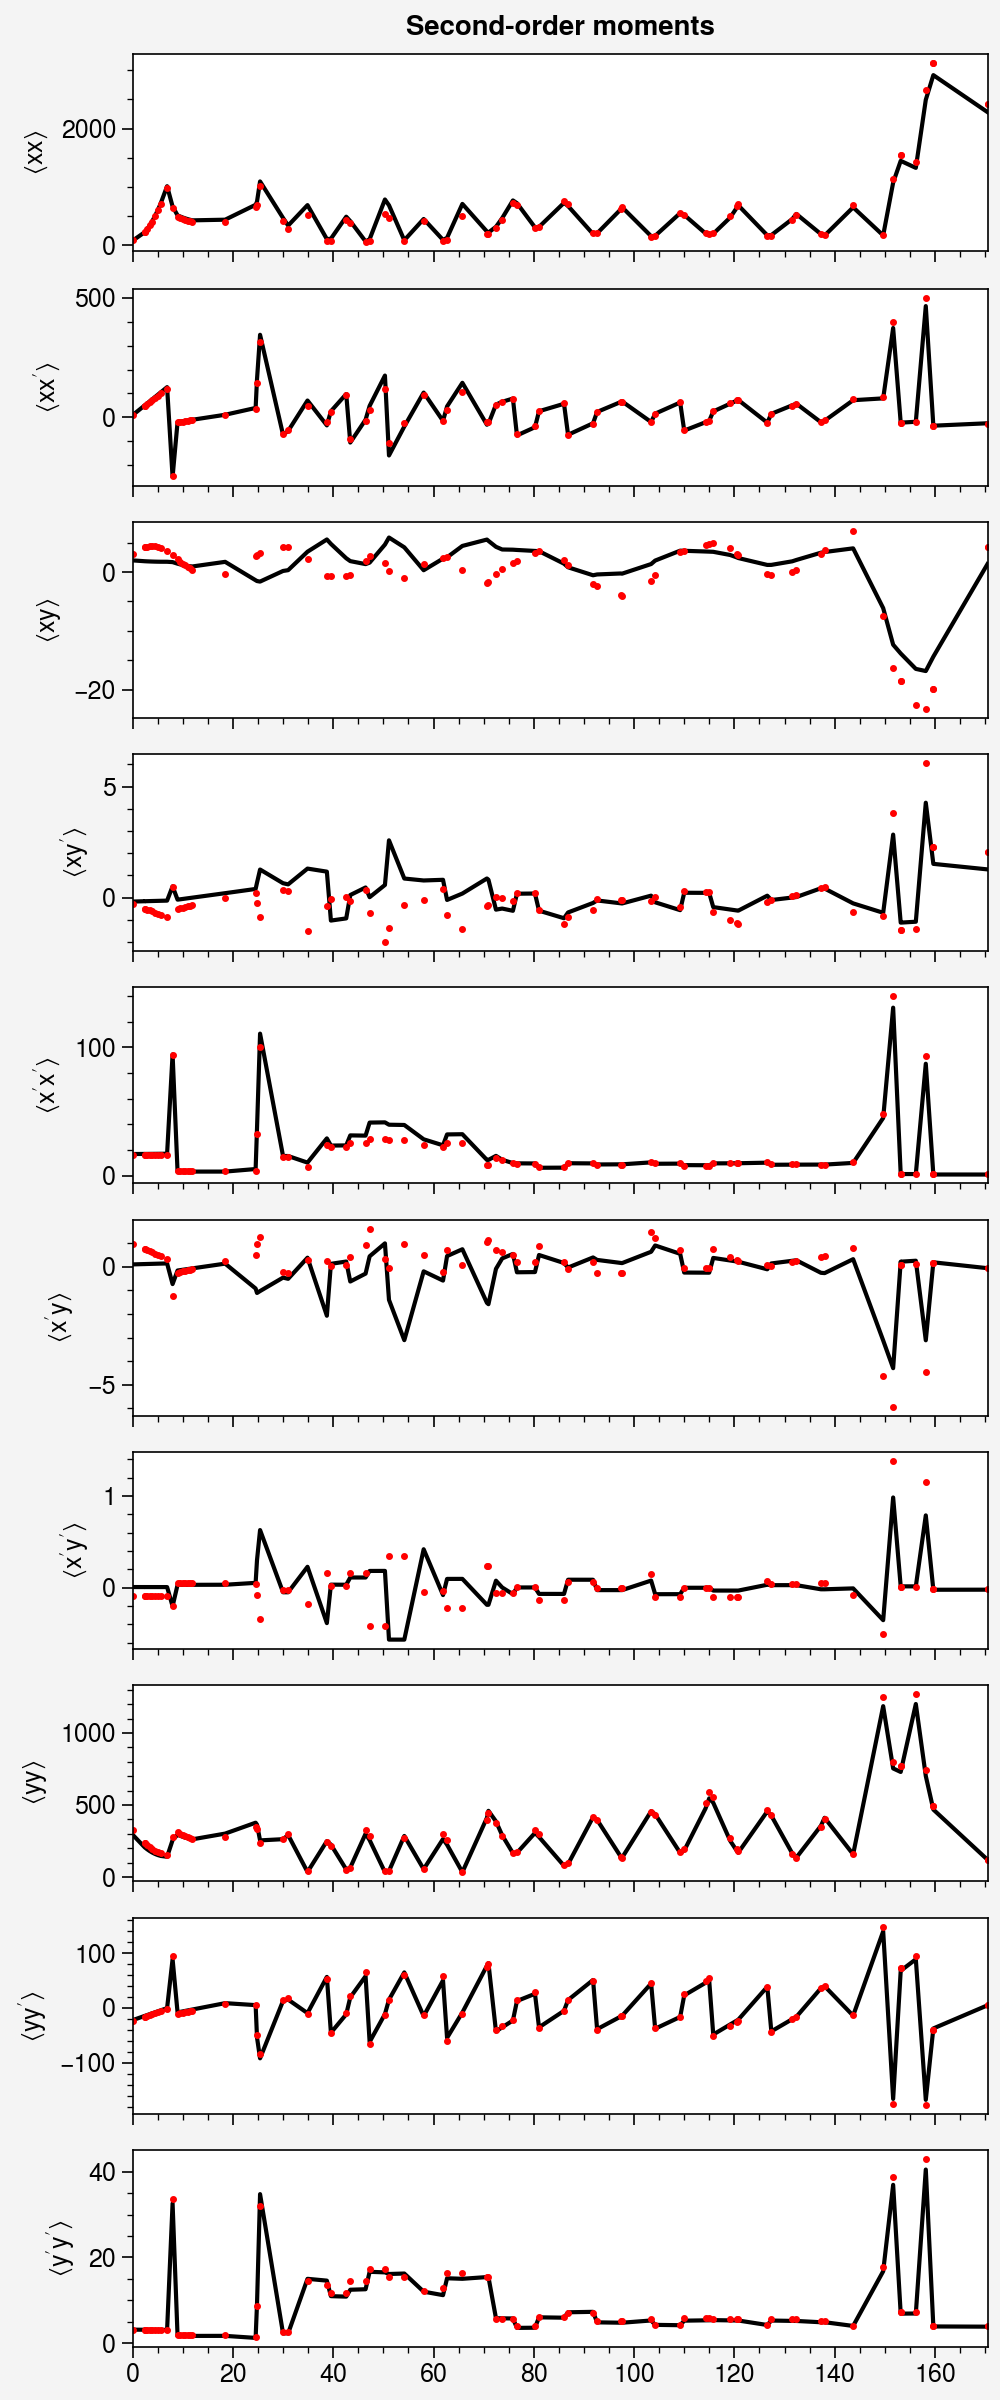

In [14]:
sim_kws = dict(color='black')
ws_kws = dict(color='red', lw=0, marker='.', ms=3)

fig, axes = pplt.subplots(nrows=10, figsize=(5, 12), spany=False)

labels = [r"$\langle{xx}\rangle$",
          r"$\langle{xx'}\rangle$",
          r"$\langle{xy}\rangle$",
          r"$\langle{xy'}\rangle$",
          r"$\langle{x'x'}\rangle$",
          r"$\langle{x'y}\rangle$",
          r"$\langle{x'y'}\rangle$",
          r"$\langle{yy}\rangle$",
          r"$\langle{yy'}\rangle$",
          r"$\langle{y'y'}\rangle$",
         ]

color = 'black'
for i, ax in enumerate(axes):
    ax.plot(rec_node_positions[:, 0], stats_beam.moments.iloc[:, i], **sim_kws)
    ax.plot(rec_node_positions[:, 0], stats_ws.moments.iloc[:, i], **ws_kws)
    ax.format(ylabel=labels[i], suptitle='Second-order moments')
plt.show()

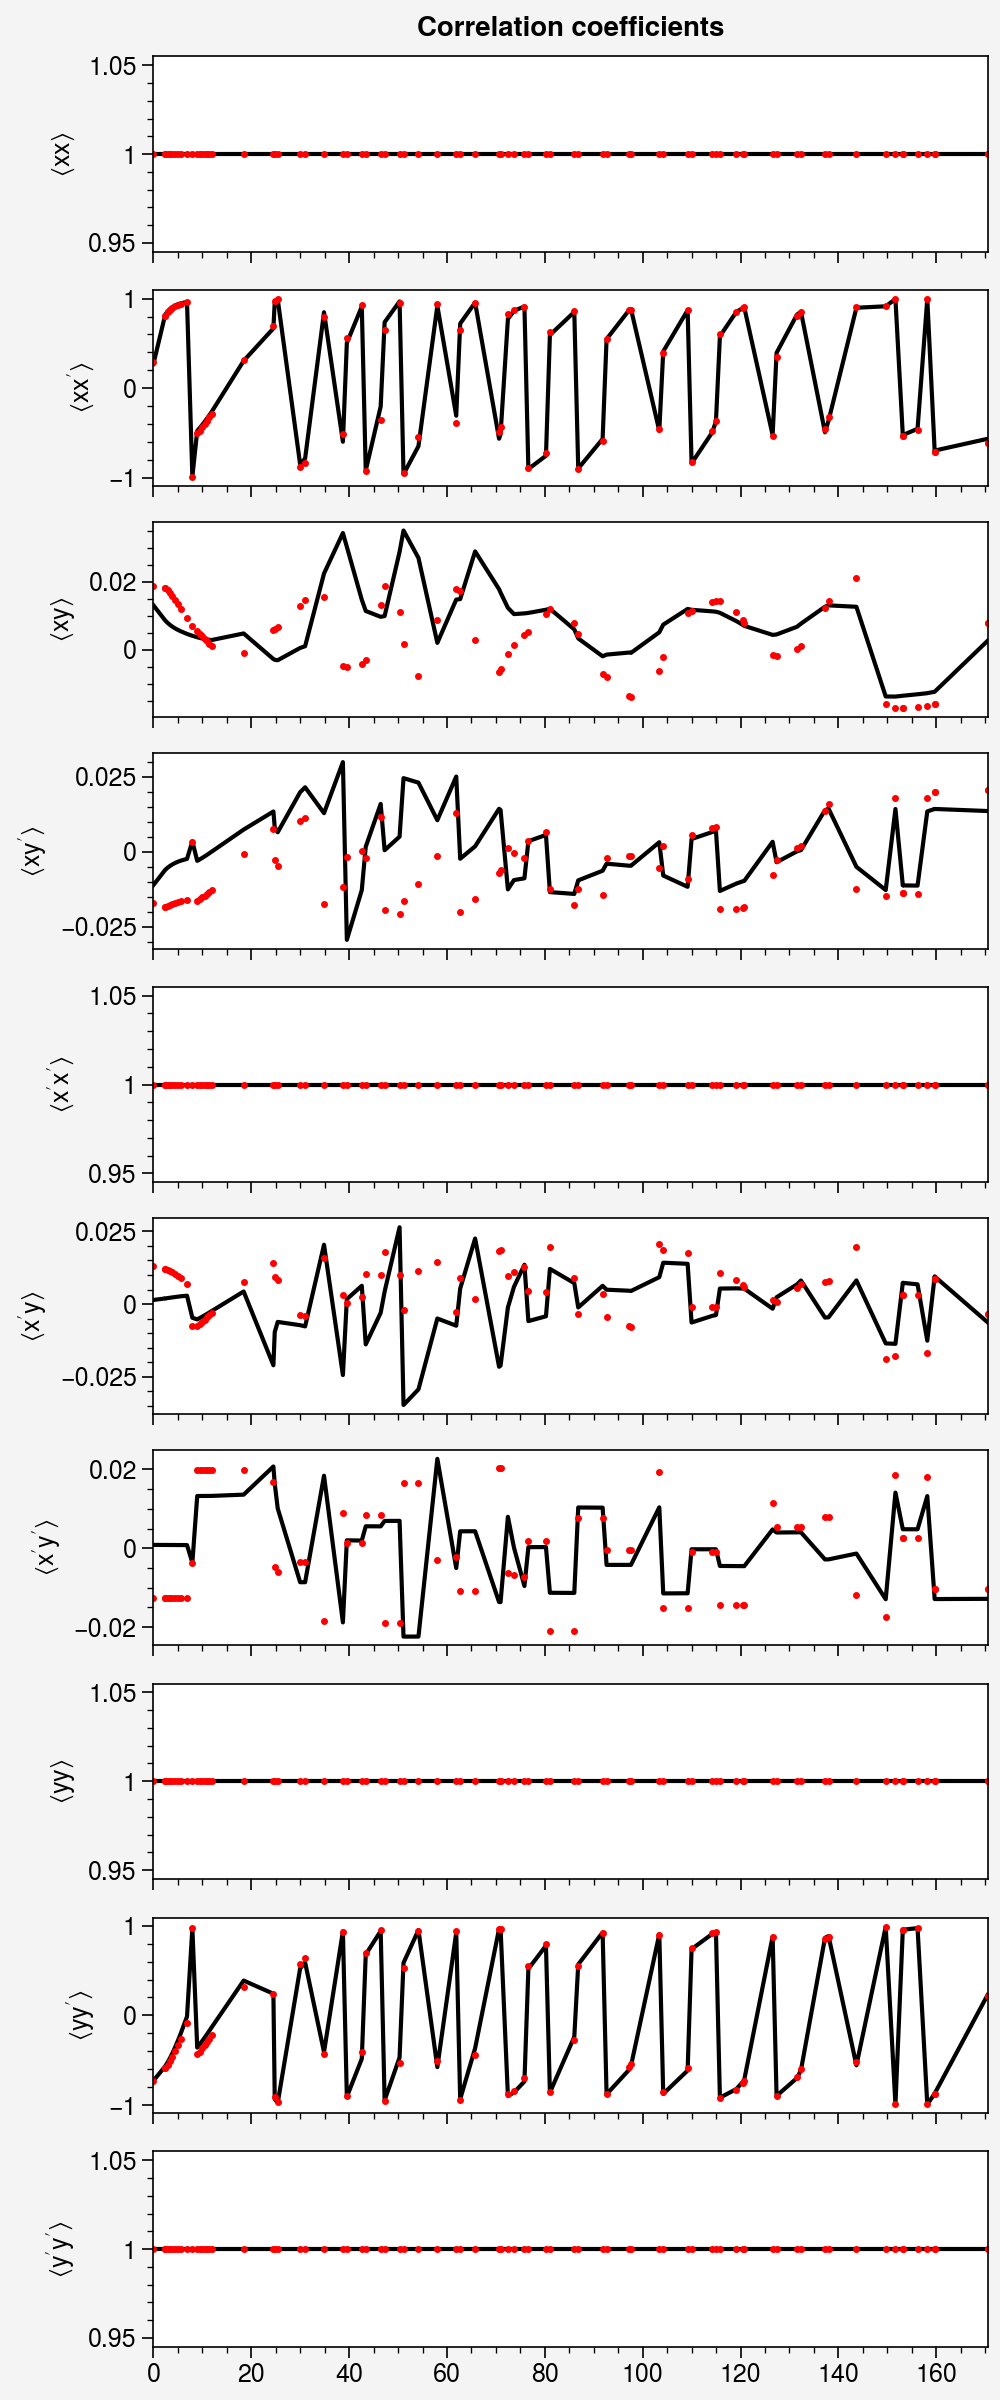

In [15]:
fig, axes = pplt.subplots(nrows=10, figsize=(5, 12), spany=False)

labels = [r"$\langle{xx}\rangle$",
          r"$\langle{xx'}\rangle$",
          r"$\langle{xy}\rangle$",
          r"$\langle{xy'}\rangle$",
          r"$\langle{x'x'}\rangle$",
          r"$\langle{x'y}\rangle$",
          r"$\langle{x'y'}\rangle$",
          r"$\langle{yy}\rangle$",
          r"$\langle{yy'}\rangle$",
          r"$\langle{y'y'}\rangle$",
         ]

for i, ax in enumerate(axes):
    ax.plot(rec_node_positions[:, 0], stats_beam.corr.iloc[:, i], **sim_kws)
    ax.plot(rec_node_positions[:, 0], stats_ws.corr.iloc[:, i], **ws_kws)
    ax.format(ylabel=labels[i], suptitle='Correlation coefficients')
plt.show()